<a href="https://colab.research.google.com/github/dagron27/se412-clustering/blob/bob/seed_analysis_dbscan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seed Analysis

In [38]:
import sys

assert sys.version_info >= (3, 7)

In [39]:
#from google.colab import drive

## Mount Google Drive (for Colab users)
#try:
#    drive.mount('/content/drive')
#except:
#    pass

In [40]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [41]:
import pandas as pd

# Read CSV file - works for both local and Colab
df = pd.read_csv('dataset/seeds_dataset.csv')

In [42]:
df.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coef,kernel_groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area            210 non-null    float64
 1   perimeter       210 non-null    float64
 2   compactness     210 non-null    float64
 3   kernel_length   210 non-null    float64
 4   kernel_width    210 non-null    float64
 5   asymmetry_coef  210 non-null    float64
 6   kernel_groove   210 non-null    float64
 7   class           210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [44]:
df['class'].unique()

array([1, 2, 3])

In [45]:
df["class"].value_counts()

,count
class,
1,70
2,70
3,70


In [46]:
df_unlabeled = df.drop('class', axis=1)

In [47]:
class_dfs = [df[df['class'] == i].drop('class', axis=1) for i in df['class'].unique()]

In [48]:
class_dfs[0].describe()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coef,kernel_groove
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,14.334429,14.294286,0.880070,5.508057,3.244629,2.667403,5.087214
std,1.215704,0.576583,0.016191,0.231508,0.177616,1.173901,0.263699
min,11.230000,12.630000,0.839200,4.902000,2.850000,0.765100,4.519000
25%,13.750000,13.960000,0.868850,5.384500,3.134250,1.826500,4.924500
50%,14.355000,14.320000,0.880500,5.534000,3.243500,2.545500,5.094000
75%,15.045000,14.732500,0.890400,5.677000,3.378500,3.301000,5.223500
max,17.080000,15.460000,0.918300,6.053000,3.683000,6.685000,5.877000


In [49]:
class_dfs[1].describe()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coef,kernel_groove
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,18.334286,16.135714,0.883517,6.148029,3.677414,3.644800,6.020600
std,1.439496,0.616995,0.015500,0.268191,0.185539,1.181868,0.253934
min,15.380000,14.660000,0.845200,5.363000,3.231000,1.472000,5.144000
25%,17.330000,15.737500,0.872525,5.979250,3.554250,2.845500,5.877500
50%,18.720000,16.210000,0.882600,6.148500,3.693500,3.609500,5.981500
75%,19.137500,16.557500,0.898225,6.312000,3.804750,4.436000,6.187750
max,21.180000,17.250000,0.910800,6.675000,4.033000,6.682000,6.550000


In [50]:
class_dfs[2].describe()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coef,kernel_groove
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,11.873857,13.247857,0.849409,5.229514,2.853771,4.788400,5.116400
std,0.723004,0.340196,0.021760,0.138015,0.147516,1.336465,0.162068
min,10.590000,12.410000,0.808100,4.899000,2.630000,1.661000,4.745000
25%,11.262500,13.002500,0.834000,5.136250,2.725500,4.048750,5.002000
50%,11.835000,13.250000,0.849350,5.224000,2.834500,4.839000,5.091500
75%,12.425000,13.470000,0.861825,5.323750,2.967000,5.467250,5.228500
max,13.370000,13.950000,0.897700,5.541000,3.232000,8.456000,5.491000


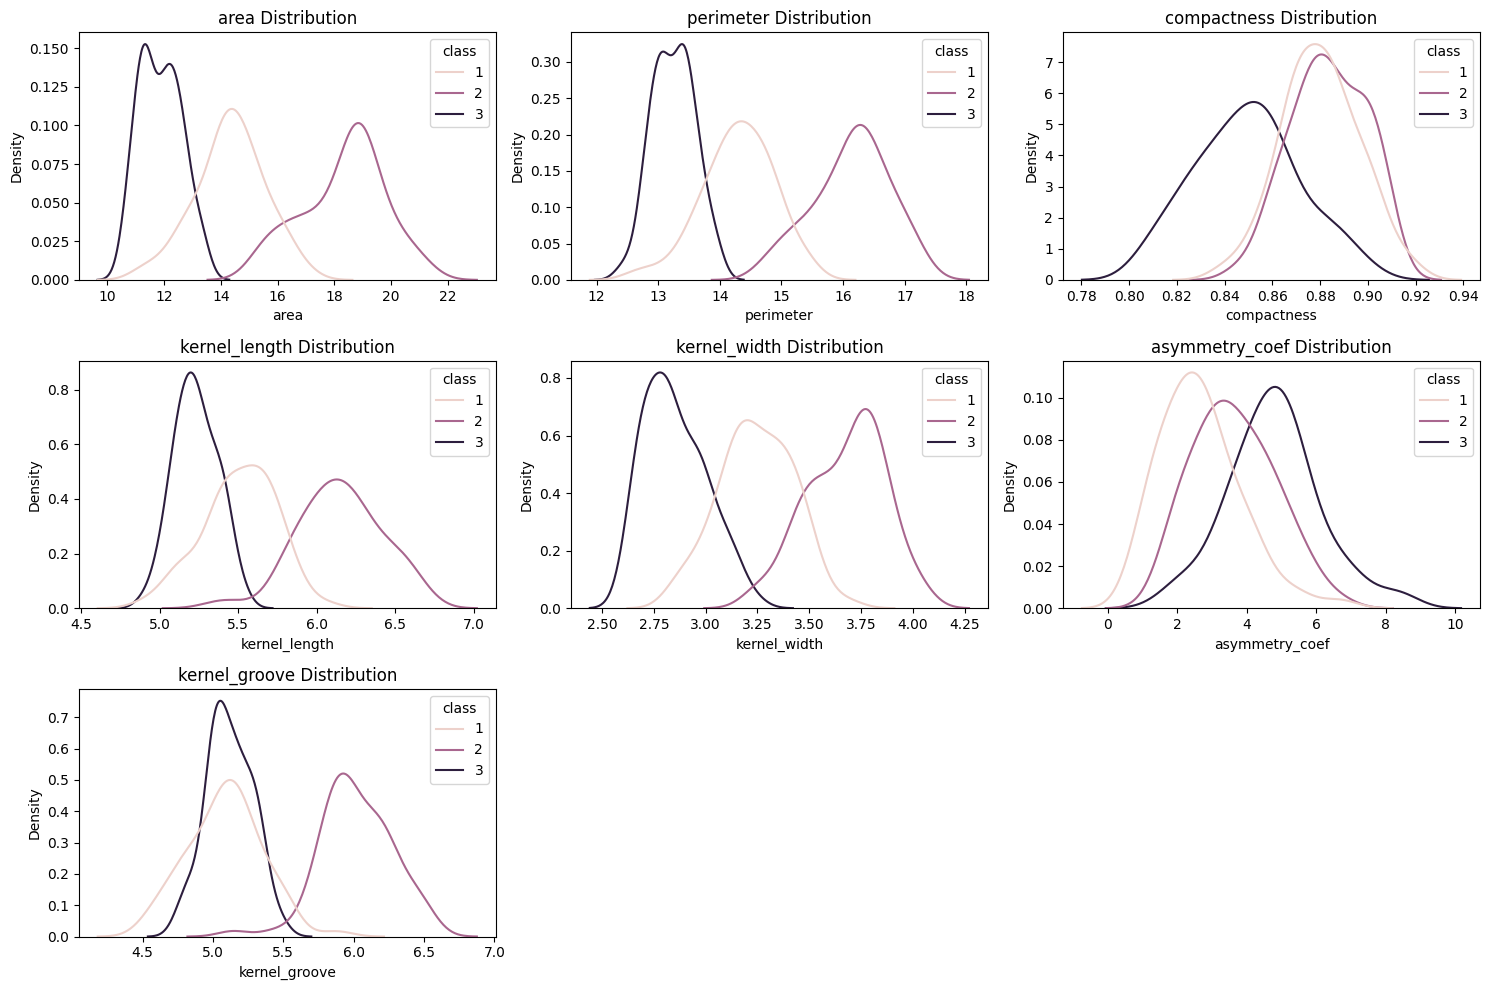

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(data=df, x=col, hue='class')
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

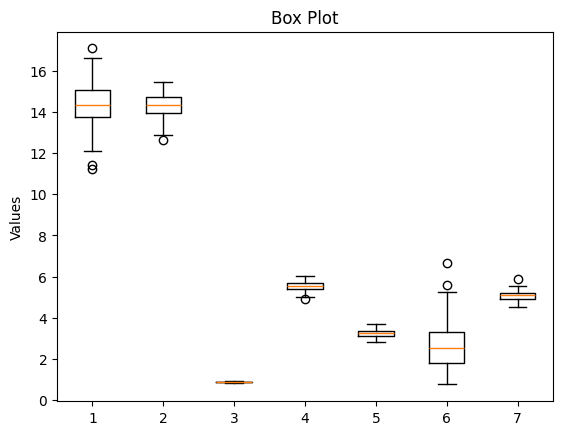

In [52]:
plt.boxplot(class_dfs[0])

plt.title("Box Plot")
plt.ylabel("Values")

plt.show()

For data group 1, outliers exist in:
1. Area
2. Perimeter
3. Kernel length
4. asymetry coefficient
5. Kernel groove length

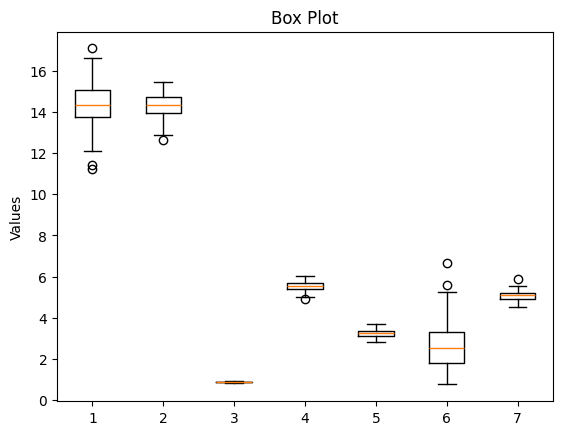

In [53]:
plt.boxplot(class_dfs[0])

plt.title("Box Plot")
plt.ylabel("Values")

plt.show()

For data group 2, outliers are in columns:
1. Area
2. Perimeter
3. Kernel length
4. asymetry coefficient
5. Kernel groove length

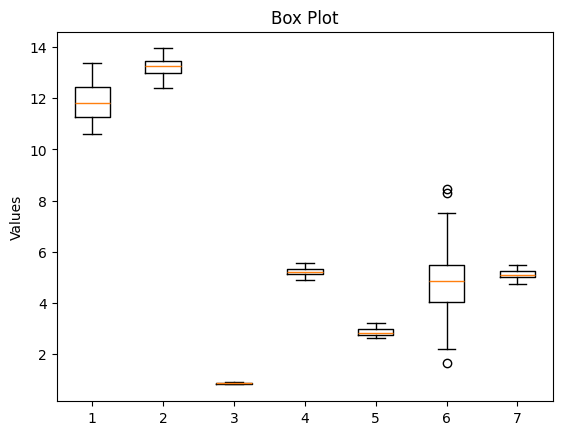

In [54]:
plt.boxplot(class_dfs[2])

plt.title("Box Plot")
plt.ylabel("Values")

plt.show()

data group 3, outlier exists in features:
1. asymetry coefficient

## Looking At Correlation

array([[<Axes: xlabel='area', ylabel='area'>,
        <Axes: xlabel='perimeter', ylabel='area'>,
        <Axes: xlabel='compactness', ylabel='area'>,
        <Axes: xlabel='kernel_length', ylabel='area'>,
        <Axes: xlabel='kernel_width', ylabel='area'>,
        <Axes: xlabel='asymmetry_coef', ylabel='area'>,
        <Axes: xlabel='kernel_groove', ylabel='area'>,
        <Axes: xlabel='class', ylabel='area'>],
       [<Axes: xlabel='area', ylabel='perimeter'>,
        <Axes: xlabel='perimeter', ylabel='perimeter'>,
        <Axes: xlabel='compactness', ylabel='perimeter'>,
        <Axes: xlabel='kernel_length', ylabel='perimeter'>,
        <Axes: xlabel='kernel_width', ylabel='perimeter'>,
        <Axes: xlabel='asymmetry_coef', ylabel='perimeter'>,
        <Axes: xlabel='kernel_groove', ylabel='perimeter'>,
        <Axes: xlabel='class', ylabel='perimeter'>],
       [<Axes: xlabel='area', ylabel='compactness'>,
        <Axes: xlabel='perimeter', ylabel='compactness'>,
        <Axes

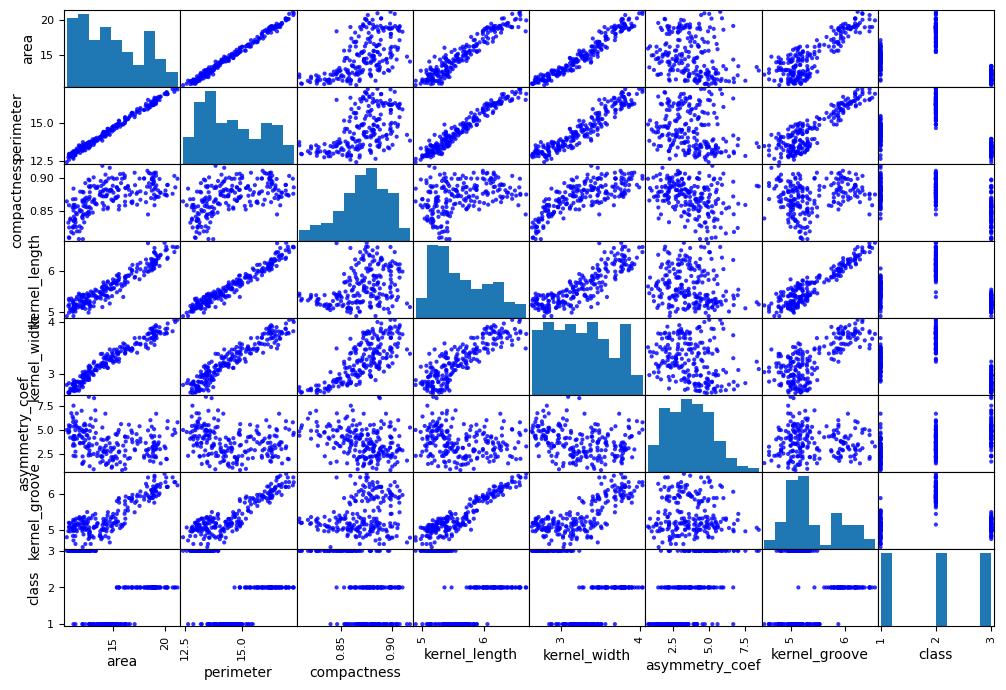

In [55]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

scatter_matrix(df, alpha=0.8, figsize=(12, 8), diagonal='hist', color='b')

In [56]:
df_unlabeled.corr()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coef,kernel_groove
area,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
perimeter,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
compactness,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
kernel_length,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
kernel_width,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
asymmetry_coef,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
kernel_groove,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


Highlights of features:
1. Area, perimeter, kernel length, kernel width, kernel groove are highly correlated.
2. For less correlated features like compactness, it is more correlated with kernel width.
3. The asymetry coefficient is the least related to any of the other features with an average of 0.2 in magnitude from 0.

Inferences:
1. Data 2 is the biggest
2. Data 3 is the most asymmetrical
3. Data 1 is the most compact

## Model Training & Building

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


pipeline = Pipeline([("scaler",StandardScaler()),("pca",PCA(n_components=3)), ("dbscan", DBSCAN(eps=0.5, min_samples=7))])

In [58]:
pipeline.fit(df_unlabeled)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=3)),
                ('dbscan', DBSCAN(min_samples=7))])

## Evaluation

In [59]:
dbscan_model = pipeline.named_steps['dbscan']

In [60]:
from sklearn.metrics import silhouette_score

labels = dbscan_model.labels_

silhouette_score = silhouette_score(df_unlabeled, labels)
print("Silhouette Score:", silhouette_score)

Silhouette Score: -0.2142054144981178


Results:

The silhouette score shows low relation to from the data points to its assigned cluster. Which means I might have had too strict of a threshold when making the clustering model. So, in conclusion, I need to change the hyperparameters again to be less strict.


In [61]:
from sklearn.metrics import adjusted_rand_score
ari_score = adjusted_rand_score(df['class'], dbscan_model.labels_)
print("Adjusted Rand Index:", ari_score)

Adjusted Rand Index: 0.0068481494200982995


Results:
1. This means the cluster labels are very different from the real labels which were the 3 wheat varieties.
2. Low ari does not affect what we are looking for.

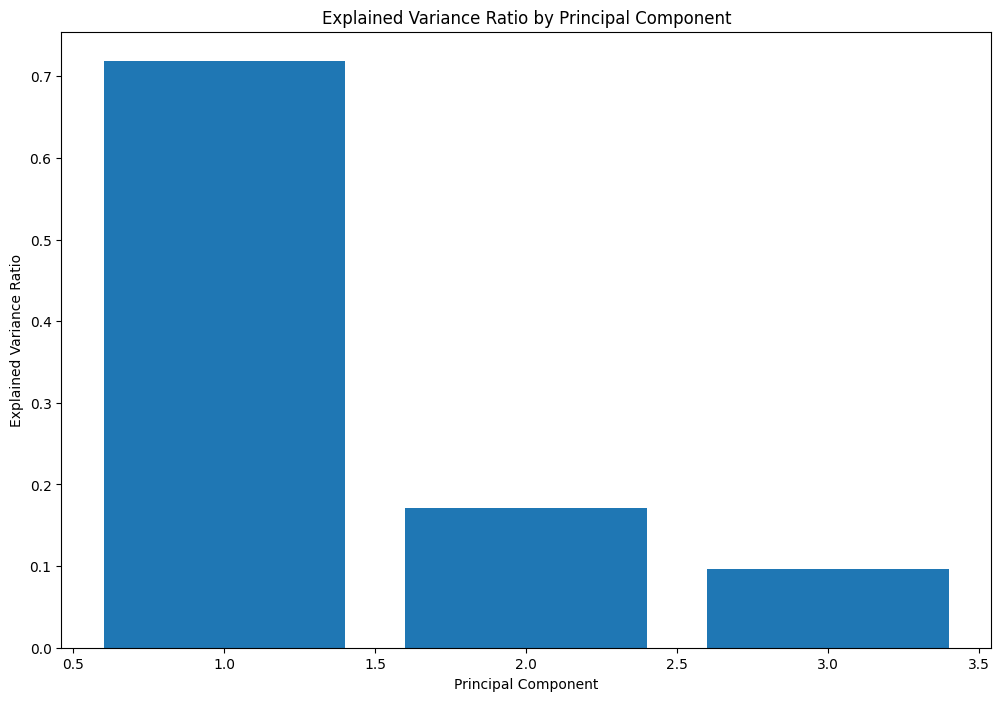

In [62]:
pca = pipeline.named_steps['pca']

pca_components = pca.components_

plt.figure(figsize=(12, 8))
plt.bar(range(1, len(pca_components) + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()

Results:
1. It could be concluded that the total variance in the data is contributed by mainly pc1 and pc2, corresponding to 90% of the variation in the data.

## Hyperparameter Tuning

In [63]:
pipeline = Pipeline([("scaler",StandardScaler()),("pca",PCA(n_components=3)), ("dbscan", DBSCAN())])

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score, make_scorer

param_grid = {
    'dbscan__eps': [0.7, 1.0,1.2],
    'dbscan__min_samples': [4, 5, 6, 7, 8,9,10,11,12]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=make_scorer(silhouette_score, greater_is_better=True))

In [65]:
grid_search.fit(df_unlabeled)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 969, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 969, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=3)),
                                       ('dbscan', DBSCAN())]),
             param_grid={'dbscan__eps': [0.7, 1.0, 1.2],
                         'dbscan__min_samples': [4, 5, 6, 7, 8, 9, 10, 11, 12]},
             scoring=make_scorer(silhouette_score, response_method='predict'))

In [66]:
dbscan_model = grid_search.best_estimator_.named_steps['dbscan']

In [67]:
labels = dbscan_model.labels_

silhouette_score = silhouette_score(df_unlabeled, labels)
print("Silhouette Score:", silhouette_score)

Silhouette Score: 0.1436973799769015


In [68]:
print(f"Best params: {grid_search.best_params_}")
print(f"Best Silhouette Score: {grid_search.best_score_}")

Best params: {'dbscan__eps': 0.7, 'dbscan__min_samples': 4}
Best Silhouette Score: nan


In [69]:
ari_score = adjusted_rand_score(df['class'], dbscan_model.labels_)
print("Adjusted Rand Index:", ari_score)

Adjusted Rand Index: 0.27405090442694086


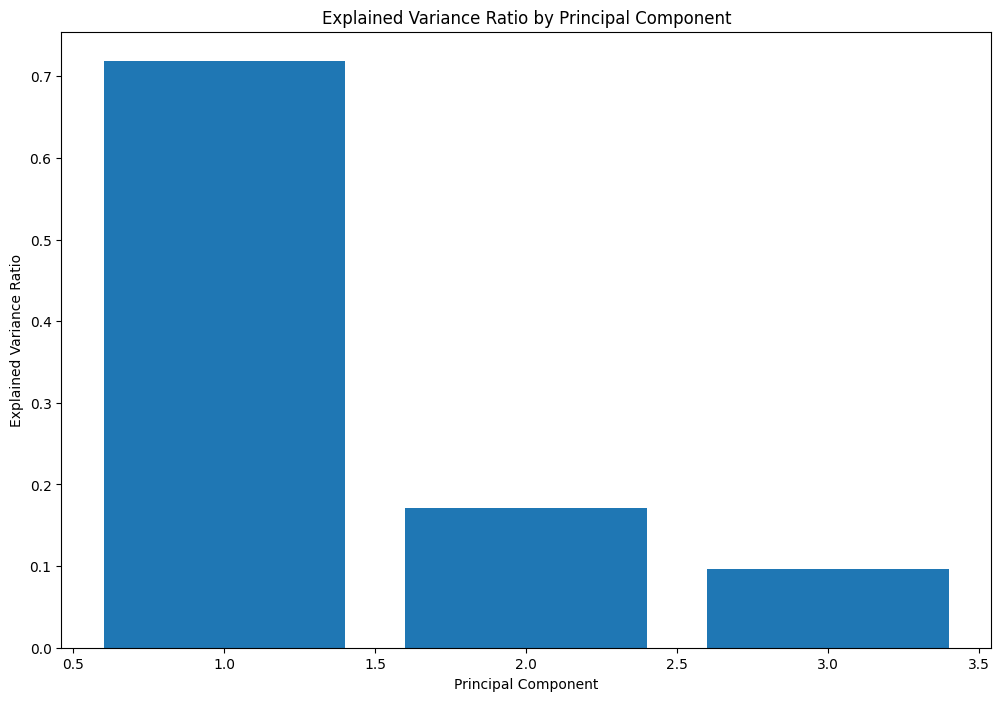

In [70]:
pca = grid_search.best_estimator_.named_steps["pca"]

pca_components = pca.components_

plt.figure(figsize=(12, 8))
plt.bar(range(1, len(pca_components) + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


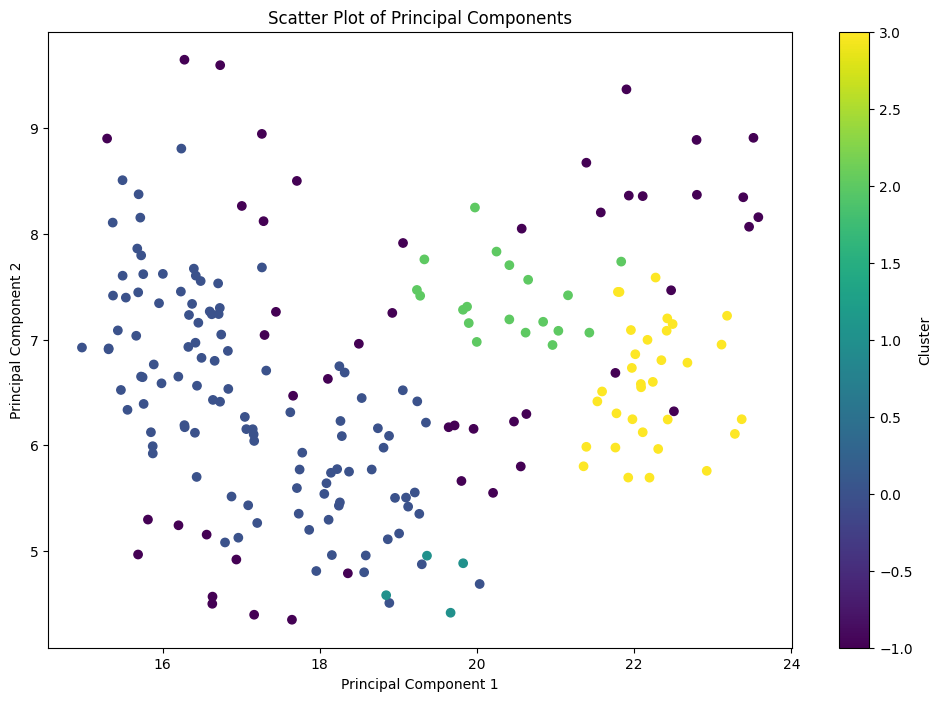

In [71]:
x_pca = pca.transform(df_unlabeled)

plt.figure(figsize=(12,8))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Principal Components')
plt.colorbar(label='Cluster')
plt.show()